<a href="https://colab.research.google.com/github/Guilherme-J-C/Curso_Pandas/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyparsing.helpers import lineStart
from matplotlib import style

In [316]:
titanic = pd.read_excel("titanic3.xls")
display(titanic)
display(titanic.info())

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


None

In [317]:
colunas = ['name', 'sibsp', 'parch', 'ticket', 'cabin', 'fare', 'boat', 'body']
titanic.drop(labels=colunas, axis=1, inplace=True)
display(titanic)
display(titanic.info())

,pclass,survived,sex,age,embarked,home.dest
0,1,1,female,29.0000,S,"St Louis, MO"
1,1,1,male,0.9167,S,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,S,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,S,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...
1304,3,0,female,14.5000,C,NaN
1305,3,0,female,NaN,C,NaN
1306,3,0,male,26.5000,C,NaN
1307,3,0,male,27.0000,C,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   sex        1309 non-null   object 
 3   age        1046 non-null   float64
 4   embarked   1307 non-null   object 
 5   home.dest  745 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 61.5+ KB


None

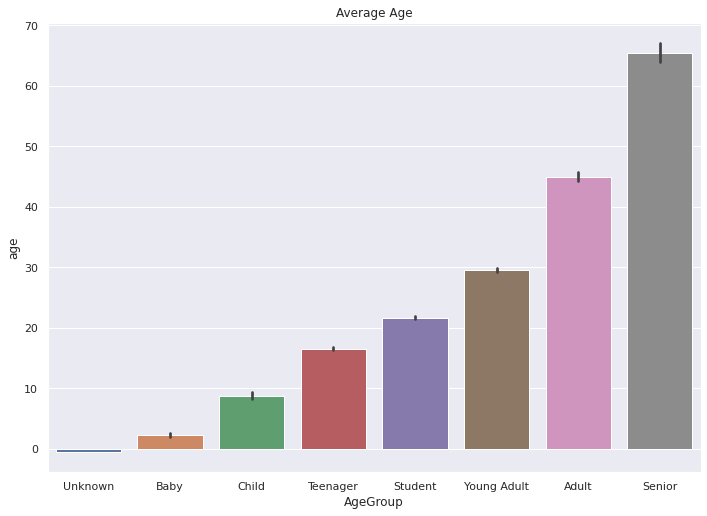

In [318]:
titanic['age'] = titanic['age'].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
color= ['gray', 'orange', 'verde', 'purple', 'blue', 'brown', 'pink', 'black']

titanic['AgeGroup'] = pd.cut(titanic['age'], bins, labels=labels)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='AgeGroup', y='age', data=titanic).set_title('Average Age')
plt.show()

In [319]:
titanic['sex'] = np.where(titanic['sex'] == 'male', 'Men', 'Women')
display(titanic.head(15))

,pclass,survived,sex,age,embarked,home.dest,AgeGroup
0,1,1,Women,29.0000,S,"St Louis, MO",Young Adult
1,1,1,Men,0.9167,S,"Montreal, PQ / Chesterville, ON",Baby
2,1,0,Women,2.0000,S,"Montreal, PQ / Chesterville, ON",Baby
3,1,0,Men,30.0000,S,"Montreal, PQ / Chesterville, ON",Young Adult
4,1,0,Women,25.0000,S,"Montreal, PQ / Chesterville, ON",Young Adult
5,1,1,Men,48.0000,S,"New York, NY",Adult
6,1,1,Women,63.0000,S,"Hudson, NY",Senior
7,1,0,Men,39.0000,S,"Belfast, NI",Adult
8,1,1,Women,53.0000,S,"Bayside, Queens, NY",Adult
9,1,0,Men,71.0000,C,"Montevideo, Uruguay",Senior


In [320]:
rate_total = titanic['survived'].groupby(by=titanic['sex']).count()
display(rate_total)
     

sex
Men      843
Women    466
Name: survived, dtype: int64

In [321]:
from tables.undoredo import redo_create
rate_survived = titanic['survived'].groupby(by=titanic['sex']).sum()
display(rate_survived)
     

sex
Men      161
Women    339
Name: survived, dtype: int64

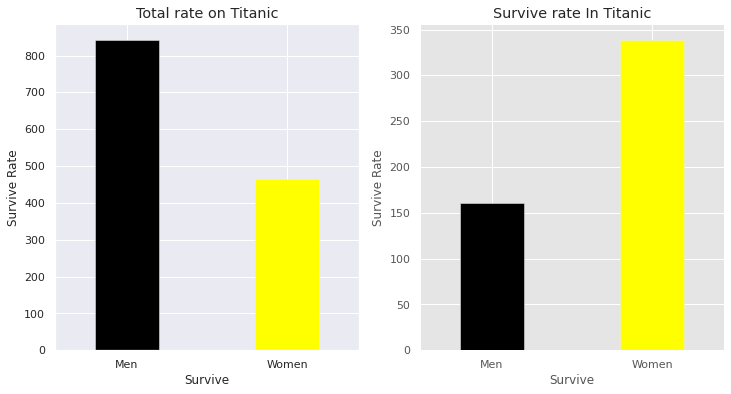

In [322]:
plt.figure(figsize = ((12, 6)))
plt.subplot(1,2,1)
style.use('ggplot')
grafico1 = rate_total.plot(
    kind='bar',
    title="Total rate on Titanic",
    xlabel="Sex",
    ylabel="Rate",
    color=['black','yellow'],
    width=.4
)
grafico1.set_xlabel("Survive")
grafico1.set_ylabel("Survive Rate")
plt.xticks(rotation=0)

plt.subplot(1,2,2)
grafico2 = rate_survived.plot(
    kind='bar',
    title="Survive rate In Titanic",
    xlabel="Survive",
    ylabel="Survive Rate",
    color=['black','yellow'],
    width=.4
)
grafico2.set_xlabel("Survive")
grafico2.set_ylabel("Survive Rate")
plt.xticks(rotation=0)
plt.show()

In [323]:
def pclass(value):
    if value == 1:
        return '1st class'
    elif value == 2:
        return "2nd class"
    elif value == 3:
        return "3rd class"
    else:
      return value


titanic['pclass'] = titanic['pclass'].map(pclass)

display(titanic)

,pclass,survived,sex,age,embarked,home.dest,AgeGroup
0,1st class,1,Women,29.0000,S,"St Louis, MO",Young Adult
1,1st class,1,Men,0.9167,S,"Montreal, PQ / Chesterville, ON",Baby
2,1st class,0,Women,2.0000,S,"Montreal, PQ / Chesterville, ON",Baby
3,1st class,0,Men,30.0000,S,"Montreal, PQ / Chesterville, ON",Young Adult
4,1st class,0,Women,25.0000,S,"Montreal, PQ / Chesterville, ON",Young Adult
...,...,...,...,...,...,...,...
1304,3rd class,0,Women,14.5000,C,NaN,Teenager
1305,3rd class,0,Women,-0.5000,C,NaN,Unknown
1306,3rd class,0,Men,26.5000,C,NaN,Young Adult
1307,3rd class,0,Men,27.0000,C,NaN,Young Adult


In [324]:
titanic['pclass'].groupby(by=titanic['pclass']).count()
display(rate_total)

sex
Men      843
Women    466
Name: survived, dtype: int64

Text(0.5, 0, '')

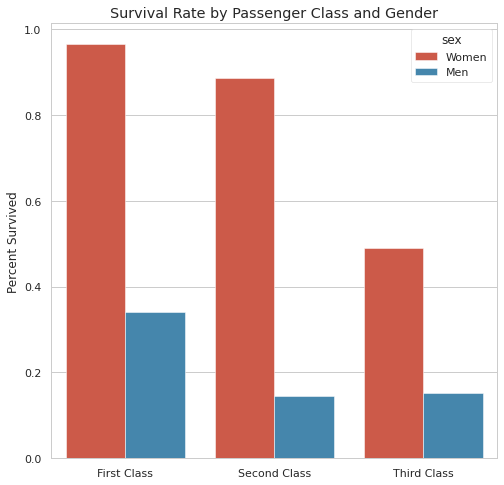

In [325]:
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(8,8))
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic, ax=axis, ci=None)
axis.set_title('Survival Rate by Passenger Class and Gender')
loc, labels = plt.xticks()
plt.xticks(loc, ['First Class','Second Class', 'Third Class'])
axis.set_ylabel('Percent Survived')
axis.set_xlabel('')